In [2]:
# Standalone Cell: Generate Synthetic Data with Trained Model
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Sample data for fitting the scaler (to initialize min_ and scale_)
# The original ranges of Original data
data_sample = pd.DataFrame({
    'P_SEXE': [1, 2],
    'D_HREDE': [0, 1],  # Example min-max values for the original range
    'P_GRAGE': [10, 90]  # Example range for P_GRAGE
})

# Initialize and fit the scaler
scaler = MinMaxScaler()
scaler.fit(data_sample)

# Recreate the neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=2),  # Input dimensions for P_SEXE and D_HREDE
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output for P_GRAGE
])

# Compile the model (weights loaded for practical use)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Generate random normalized inputs for P_SEXE and D_HREDE
num_samples = 1000  # Number of synthetic samples to generate
random_input = np.random.uniform(0, 1, (num_samples, 2))  # Generate inputs for two features

# Predict P_GRAGE using the trained model
synthetic_output = model.predict(random_input)

# Combine inputs and predictions into a synthetic dataset
synthetic_data = pd.DataFrame(random_input, columns=['P_SEXE', 'D_HREDE'])
synthetic_data['P_GRAGE'] = synthetic_output

# Post-process synthetic data
synthetic_data = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=['P_SEXE', 'D_HREDE', 'P_GRAGE'])
synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].round().clip(1, 2).astype(int)  # Ensure P_SEXE values are valid
synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].round().astype(int)  # Ensure P_GRAGE is an integer

print("Synthetic data generated:")
print(synthetic_data.head())


 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step

C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Synthetic data generated:
   P_SEXE   D_HREDE  P_GRAGE
0       2  0.300642       16
1       2  0.232412       15
2       1  0.039720       10
3       2  0.963486       26
4       2  0.425870       18


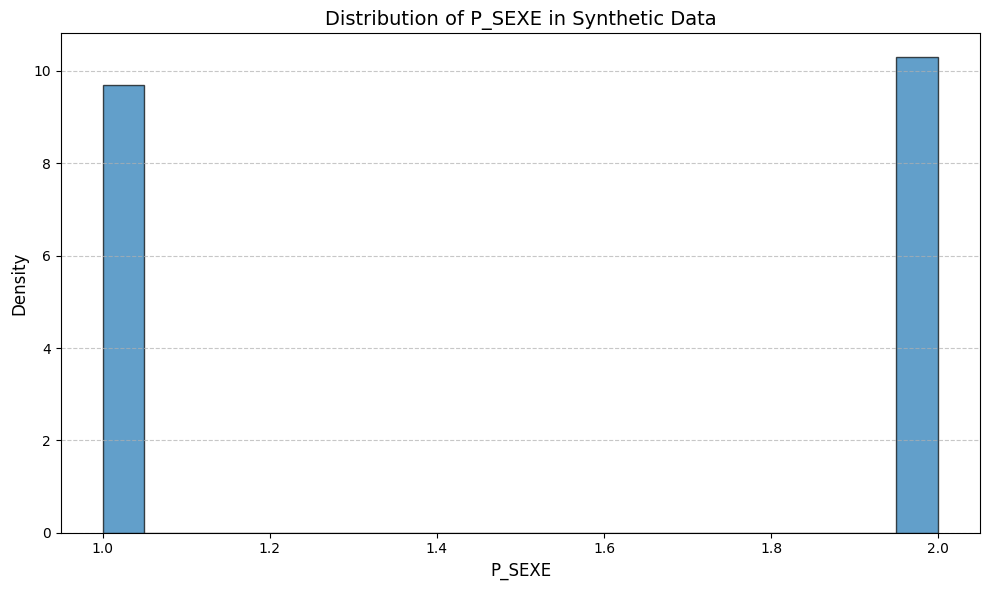

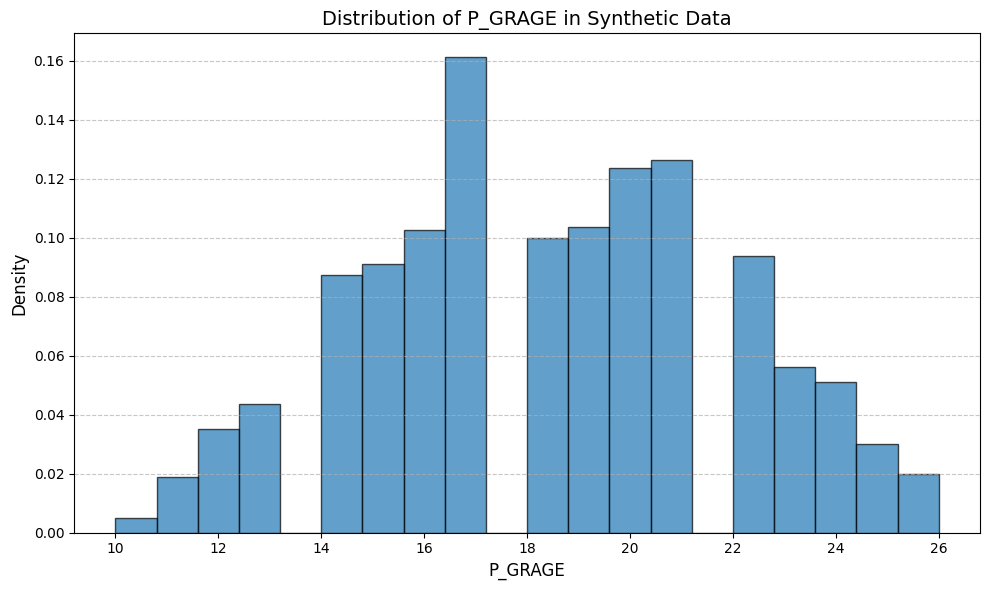

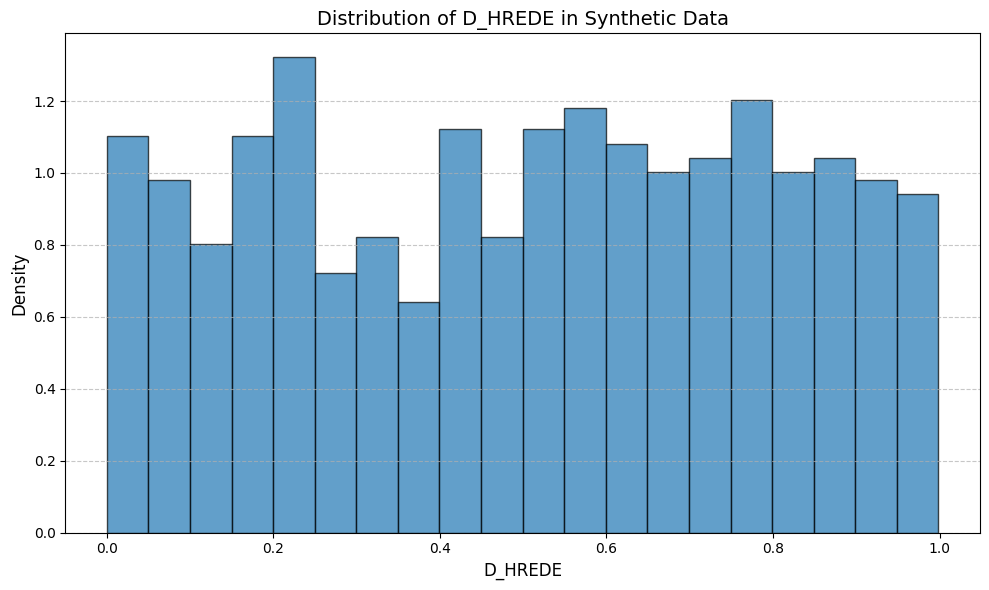

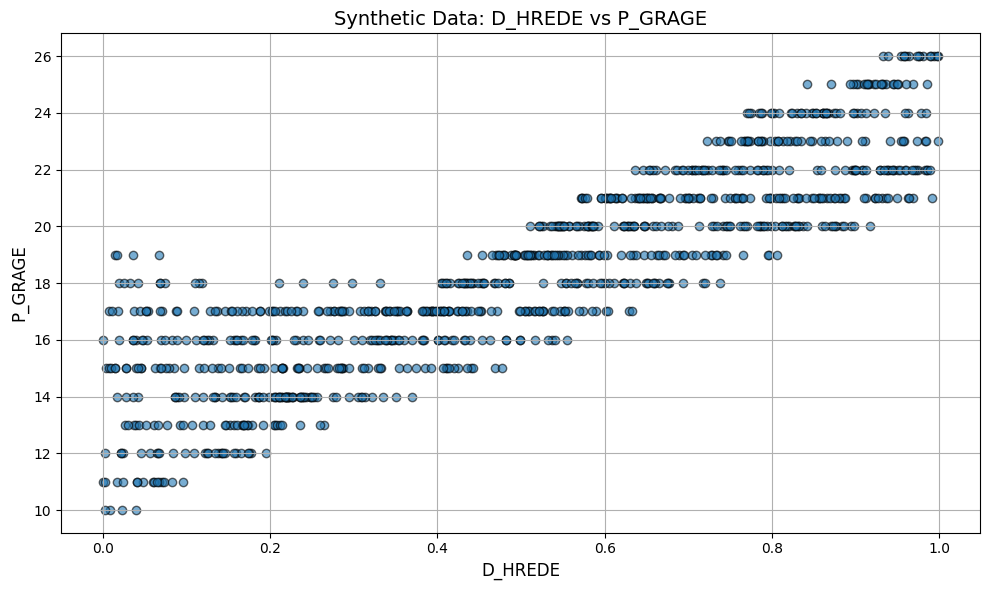

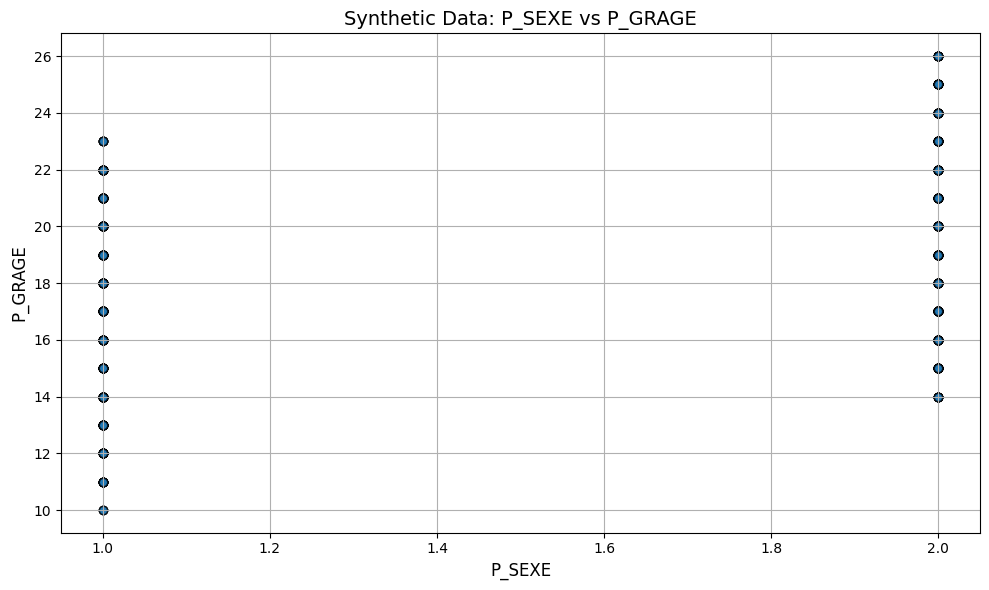

In [3]:
import matplotlib.pyplot as plt

# Plot distribution of each column in the synthetic data
columns_to_plot = ['P_SEXE', 'P_GRAGE', 'D_HREDE']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(synthetic_data[column], bins=20, alpha=0.7, edgecolor='black', density=True)
    plt.title(f"Distribution of {column} in Synthetic Data", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Scatter plot for feature relationships
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_data['D_HREDE'], synthetic_data['P_GRAGE'], alpha=0.6, edgecolor='k')
plt.title("Synthetic Data: D_HREDE vs P_GRAGE", fontsize=14)
plt.xlabel("D_HREDE", fontsize=12)
plt.ylabel("P_GRAGE", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(synthetic_data['P_SEXE'], synthetic_data['P_GRAGE'], alpha=0.6, edgecolor='k')
plt.title("Synthetic Data: P_SEXE vs P_GRAGE", fontsize=14)
plt.xlabel("P_SEXE", fontsize=12)
plt.ylabel("P_GRAGE", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
